# 用来将低维度，图像搜索（压缩），数据压缩，信息检索

In [2]:
import torch
import torch.nn as nn
import torch.utils.data as Data
import torchvision
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
import numpy as np

In [3]:
# torch.manual_seed(1) # reproducible

In [4]:
# Hyper Parameters
EPOCH = 10
BATCH_SIZE = 64
LR = 0.005 # learning
DOWNLOAD_MNIST = False
N_TEST_IMG = 5

In [5]:
train_data = torchvision.datasets.MNIST(  # 训练数据集
    root='./mnist/',
    train=True,
    transform=torchvision.transforms.ToTensor(),
    
    download=DOWNLOAD_MNIST,
)

torch.Size([60000, 28, 28])
torch.Size([60000])


D:\Anaconda\lib\site-packages\torchvision\datasets\mnist.py:53: UserWarning: train_data has been renamed data
  warnings.warn("train_data has been renamed data")
D:\Anaconda\lib\site-packages\torchvision\datasets\mnist.py:43: UserWarning: train_labels has been renamed targets
  warnings.warn("train_labels has been renamed targets")


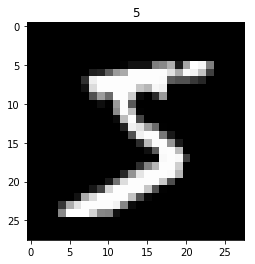

In [6]:
# plot one example
print(train_data.train_data.size())
print(train_data.train_labels.size())
plt.imshow(train_data.train_data[0].numpy(), cmap='gray')
plt.title('%i' % train_data.train_labels[0])
plt.show()

In [7]:
# Data Loader for easy mini_batch return in training, the image batch shape will be (50, 1, 28, 28)
train_loader = Data.DataLoader(dataset=train_data, batch_size=BATCH_SIZE, shuffle=True)

In [8]:
class AutoEcoder(nn.Module):
    def __init__(self):
        super(AutoEcoder, self).__init__()
        
        self.encoder = nn.Sequential(
            nn.Linear(28*28, 128),
            nn.Tanh(),
            nn.Linear(128, 64),
            nn.Tanh(),
            nn.Linear(64, 12),
            nn.Tanh(),
            nn.Linear(12, 3),    # compressto 3 features which can be visualized in plt
        )
        self.decoder = nn.Sequential(
            nn.Linear(3, 12),
            nn.Tanh(),
            nn.Linear(12, 64),
            nn.Tanh(),
            nn.Linear(64, 128),
            nn.Tanh(),
            nn.Linear(128, 28*28),
            nn.Sigmoid(),   # compress to a range (0, 1)
        )
        
    def forward(self, x):
        encoder = self.encoder(x)
        decoder = self.decoder(encoder)
        return encoder, decoder

In [9]:
autoencoder = AutoEcoder()
print(autoencoder)

AutoEcoder(
  (encoder): Sequential(
    (0): Linear(in_features=784, out_features=128, bias=True)
    (1): Tanh()
    (2): Linear(in_features=128, out_features=64, bias=True)
    (3): Tanh()
    (4): Linear(in_features=64, out_features=12, bias=True)
    (5): Tanh()
    (6): Linear(in_features=12, out_features=3, bias=True)
  )
  (decoder): Sequential(
    (0): Linear(in_features=3, out_features=12, bias=True)
    (1): Tanh()
    (2): Linear(in_features=12, out_features=64, bias=True)
    (3): Tanh()
    (4): Linear(in_features=64, out_features=128, bias=True)
    (5): Tanh()
    (6): Linear(in_features=128, out_features=784, bias=True)
    (7): Sigmoid()
  )
)


In [10]:
optimizer = torch.optim.Adam(autoencoder.parameters(), lr=LR)
loss_func = nn.MSELoss()

D:\Anaconda\lib\site-packages\torchvision\datasets\mnist.py:53: UserWarning: train_data has been renamed data
  warnings.warn("train_data has been renamed data")


Epoch:  0 | train loss: 0.2327


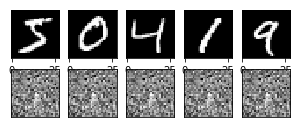

Epoch:  0 | train loss: 0.0673


Epoch:  0 | train loss: 0.0619


Epoch:  0 | train loss: 0.0621


Epoch:  0 | train loss: 0.0524


Epoch:  0 | train loss: 0.0513


Epoch:  0 | train loss: 0.0494


Epoch:  0 | train loss: 0.0475


Epoch:  0 | train loss: 0.0457


Epoch:  0 | train loss: 0.0403


Epoch:  1 | train loss: 0.0391


Epoch:  1 | train loss: 0.0414


Epoch:  1 | train loss: 0.0387


Epoch:  1 | train loss: 0.0422


Epoch:  1 | train loss: 0.0402


Epoch:  1 | train loss: 0.0367


Epoch:  1 | train loss: 0.0368


Epoch:  1 | train loss: 0.0411


Epoch:  1 | train loss: 0.0383


Epoch:  1 | train loss: 0.0379


Epoch:  2 | train loss: 0.0390


Epoch:  2 | train loss: 0.0397


Epoch:  2 | train loss: 0.0399


Epoch:  2 | train loss: 0.0411


Epoch:  2 | train loss: 0.0364


Epoch:  2 | train loss: 0.0374


Epoch:  2 | train loss: 0.0374


Epoch:  2 | train loss: 0.0376


Epoch:  2 | train loss: 0.0360


Epoch:  2 | train loss: 0.0414


Epoch:  3 | train loss: 0.0401


Epoch:  3 | train loss: 0.0372


Epoch:  3 | train loss: 0.0417


Epoch:  3 | train loss: 0.0365


Epoch:  3 | train loss: 0.0375


Epoch:  3 | train loss: 0.0346


Epoch:  3 | train loss: 0.0370


Epoch:  3 | train loss: 0.0391


Epoch:  3 | train loss: 0.0336


Epoch:  3 | train loss: 0.0376


Epoch:  4 | train loss: 0.0326


Epoch:  4 | train loss: 0.0352


Epoch:  4 | train loss: 0.0332


Epoch:  4 | train loss: 0.0350


Epoch:  4 | train loss: 0.0342


Epoch:  4 | train loss: 0.0376


Epoch:  4 | train loss: 0.0325


Epoch:  4 | train loss: 0.0369


Epoch:  4 | train loss: 0.0393


Epoch:  4 | train loss: 0.0391


Epoch:  5 | train loss: 0.0352


Epoch:  5 | train loss: 0.0365


Epoch:  5 | train loss: 0.0363


Epoch:  5 | train loss: 0.0346


Epoch:  5 | train loss: 0.0339


Epoch:  5 | train loss: 0.0369


Epoch:  5 | train loss: 0.0358


Epoch:  5 | train loss: 0.0309


In [ ]:
# initialize figure
f, a = plt.subplots(2, N_TEST_IMG, figsize=(5, 2))
plt.ion() # continuously plot

# original data (first row) for viewing
view_data = train_data.train_data[:N_TEST_IMG].view(-1, 28*28).type(torch.FloatTensor)/255.
for i in range(N_TEST_IMG):
    a[0][i].imshow(np.reshape(view_data.data.numpy()[i], (28, 28)), cmap='gray'); a[0][i].set_yticks(())
    
for epoch in range(EPOCH):
    for step, (x, b_label) in enumerate(train_loader):
        b_x = x.view(-1, 28*28)    # batch x, shape (batch, 28*28)
        b_y = x.view(-1, 28*28)    # batch y, shape (batch, 28*28)
        
        encoded, decoded = autoencoder(b_x)
        
        loss = loss_func(decoded, b_y)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        
        if step % 100 == 0:
            print('Epoch: ', epoch, '| train loss: %.4f' % loss.data.numpy())
            
            # plotting decoded image (second row)
            _, decoded_data = autoencoder(view_data)
            for i in range(N_TEST_IMG):
                a[1][i].clear()
                a[1][i].imshow(np.reshape(decoded_data.data.numpy()[i], (28, 28)), cmap='gray')
                a[1][i].set_xticks(()); a[1][i].set_yticks(())
            plt.draw(); plt.pause(0.05)
            
plt.ioff()
plt.show()

In [ ]:
# visualize in 3D plot
view_data = train_data.train_data[:200].view(-1, 28*28).type(torch.FloatTensor)/255.
encoded_data, _ = autoencoder(view_data)
fig = plt.figure(2); ax = Axes3D(fig)
X, Y, Z = encoded_data.data[:, 0].numpy(), encoded_data.data[:, 1].numpy(), encoded_data.data[:, 2].numpy()
values = train_data.train_labels[:200].numpy()
for x, y, z, s in zip(X, Y, Z, values):    
    c = cm.rainbow(int(255*s/9)); ax.text(x, y, z, s, backgroundcolor=c)
    ax.set_xlim(X.min(), X.max()); ax.set_ylim(Y.min(), Y.max()); ax.set_zlim(Z.min(), Z.max())
plt.show()